<a href="https://colab.research.google.com/github/pourmand1376/Polyp_detection/blob/main/YOLOv5_Kvasir_SEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Training with YOLOv5

In this tutorial, we assemble a dataset and train a custom YOLOv5 model to recognize the objects in our dataset. To do so we will take the following steps:

* Gather a dataset of images and label our dataset
* Export our dataset to YOLOv5
* Train YOLOv5 to recognize the objects in our dataset
* Evaluate our YOLOv5 model's performance
* Run test inference to view our model at work



![](https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png)

In [ ]:
# connecting to vscode
# Install colab_ssh on google colab
!pip install colab_ssh --upgrade --quiet
from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared
launch_ssh_cloudflared('amir')

# Step 1: Install Requirements

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12844, done.
remote: Total 12844 (delta 0), reused 0 (delta 0), pack-reused 12844
Receiving objects: 100% (12844/12844), 11.81 MiB | 11.82 MiB/s, done.
Resolving deltas: 100% (8921/8921), done.
/content/yolov5
     |████████████████████████████████| 596 kB 4.4 MB/s 
     |████████████████████████████████| 145 kB 4.3 MB/s 
     |████████████████████████████████| 178 kB 39.1 MB/s 
     |████████████████████████████████| 1.1 MB 46.0 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 138 kB 49.8 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datasci

# Step 2: Assemble Our Dataset

In order to train our custom model, we need to assemble a dataset of representative images with bounding box annotations around the objects that we want to detect. And we need our dataset to be in YOLOv5 format.

In Roboflow, you can choose between two paths:

* Convert an existing dataset to YOLOv5 format. Roboflow supports over [30 formats object detection formats](https://roboflow.com/formats) for conversion.
* Upload raw images and annotate them in Roboflow with [Roboflow Annotate](https://docs.roboflow.com/annotate).

# Annotate

![](https://github.com/roboflow-ai/yolov5/wiki/images/roboflow-annotate.gif)

# Version

![](https://github.com/roboflow-ai/yolov5/wiki/images/roboflow-preprocessing.png)

# Export

![](https://github.com/roboflow-ai/yolov5/wiki/images/roboflow-export.png)

# Download Code 

![](https://github.com/roboflow-ai/yolov5/wiki/images/roboflow-snippet.png)

In [2]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [3]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [4]:
#after following the link above, recieve python code with these fields filled in
#from roboflow import Roboflow
rf = Roboflow(api_key="Quj44CovudhOOv2fXcs0")
project = rf.workspace().project("kvasir-seg-hrk5k")
dataset = project.version("1").download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Kvasir-SEG-1 in yolov5pytorch:: 100%|██████████| 4812/4812 [00:04<00:00, 1161.69it/s]


In [ ]:
%ls /content/datasets/Kvasir-SEG-1/train/images/ | wc -l
!pip install wandb

2100
     |████████████████████████████████| 1.7 MB 9.1 MB/s 
     |████████████████████████████████| 144 kB 27.8 MB/s 
     |████████████████████████████████| 181 kB 34.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=da0786c926f3967fc475538156569c007618a9c121b5023b780f78ea144d767b
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [ ]:
!python train.py --img 416 --batch 128 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/content/datasets/Kvasir-SEG-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-11-g63ddb6f torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0

In [ ]:
# save the model to google drive
from google.colab import drive
drive.mount('/content/gdrive')
!cp /content/yolov5/runs/train/exp2/weights/best.pt /content/gdrive/MyDrive/Thesis/Yolov5_kvasir.pt
!cp -r /content/yolov5/runs/train/exp2 /content/gdrive/MyDrive/Thesis/YOLOv5

In [6]:
# load model from google drive
from google.colab import drive
drive.mount('/content/gdrive')
!mkdir -p /content/yolov5/runs/train/exp
!cp -r /content/gdrive/MyDrive/Thesis/YOLOv5/* /content/yolov5/runs/train/exp

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5` - learn more about mean average precision [here](https://blog.roboflow.com/mean-average-precision/).

In [7]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [8]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Kvasir-SEG-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-133-g3eefab1 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/100 /content/datasets/Kvasir-SEG-1/test/images/cju13fwthn9mq0835gacxgy01_jpg.rf.252f1ca231395d73c52e73207936d45c.jpg: 416x416 1 json, Done. (0.028s)
image 2/100 /content/datasets/Kvasir-SEG-1/test/images/cju16ach3m1da0993r1dq3sn2_jpg.rf.90c02799da5e5f2bb77c1b2067cf70ad.jpg: 416x416 1 json, Done. (0.028s)
image 3/100 /content/datasets/Kvasir-

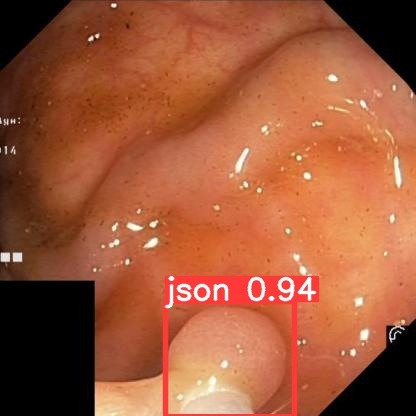

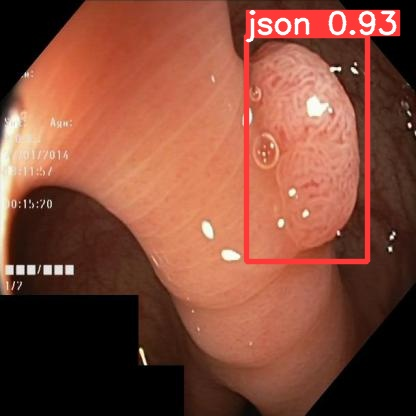

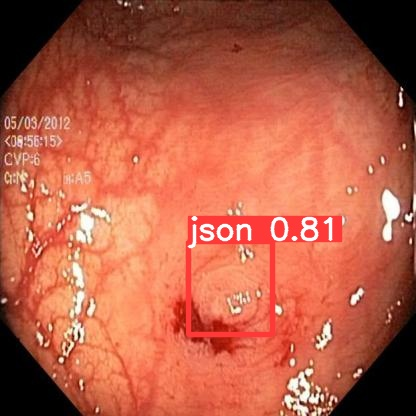

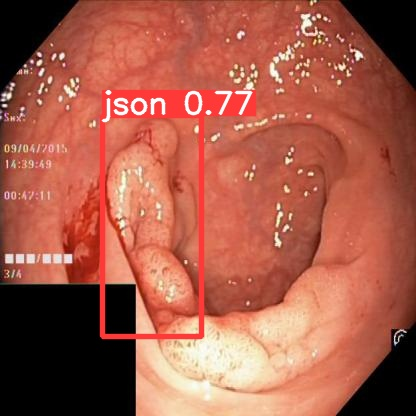

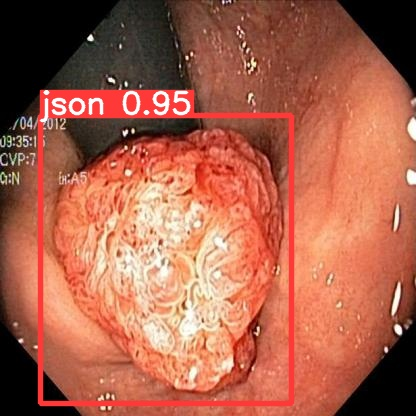

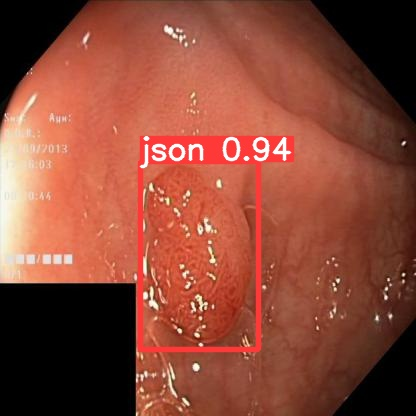

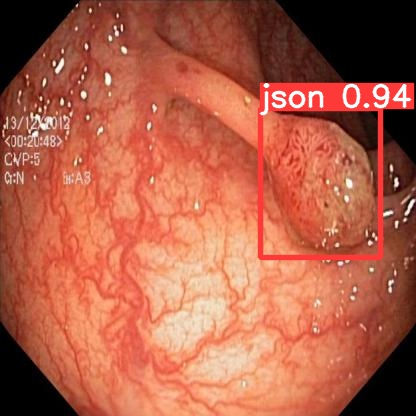

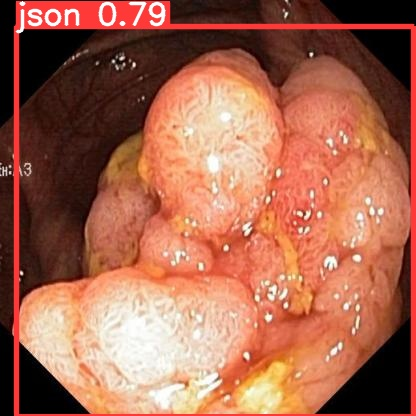

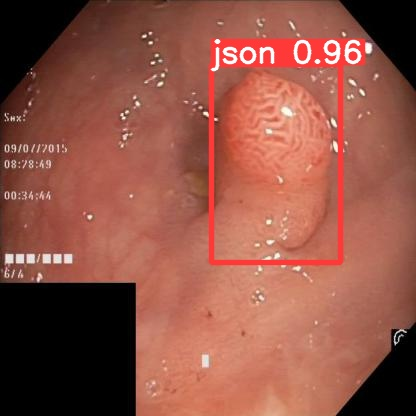

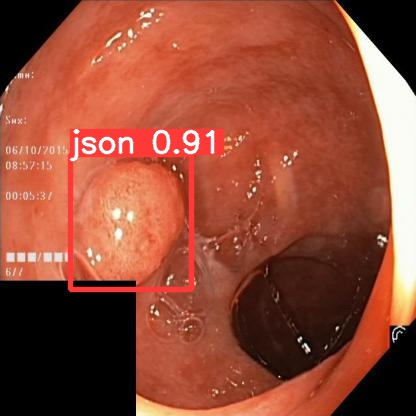

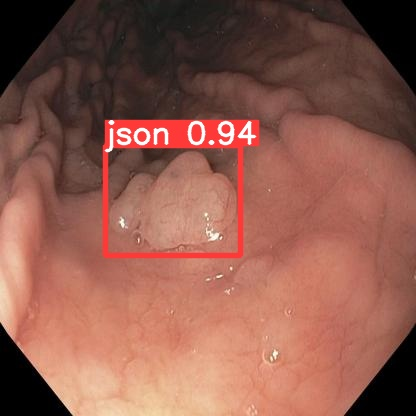

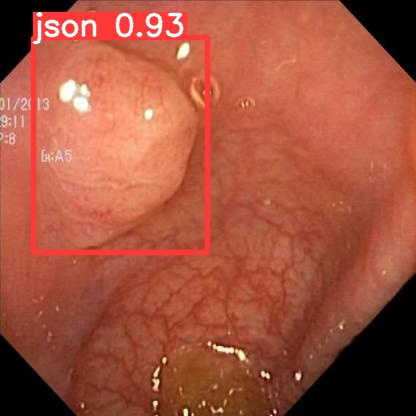

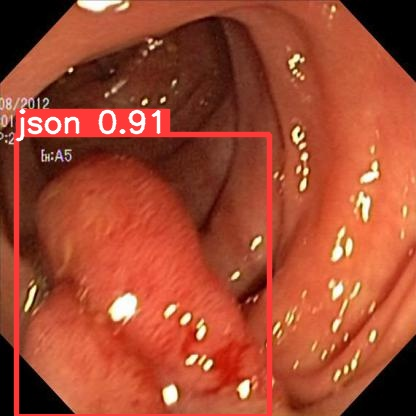

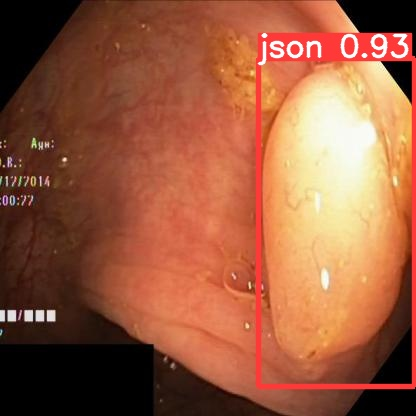

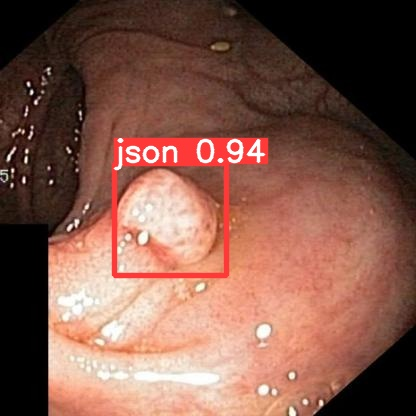

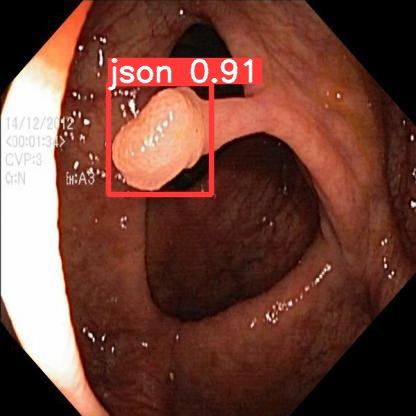

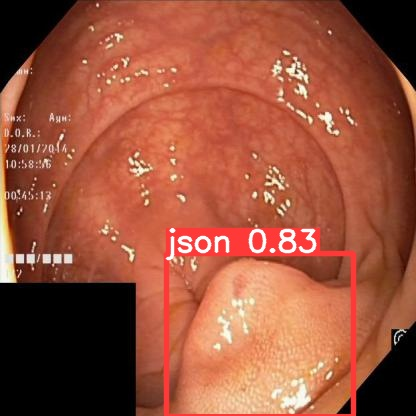

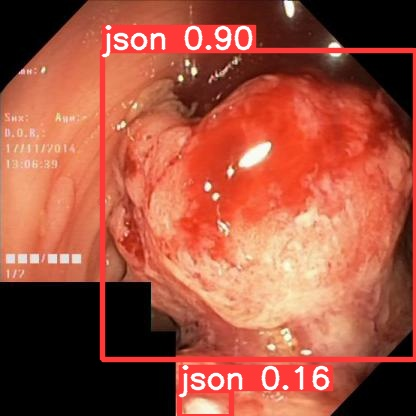

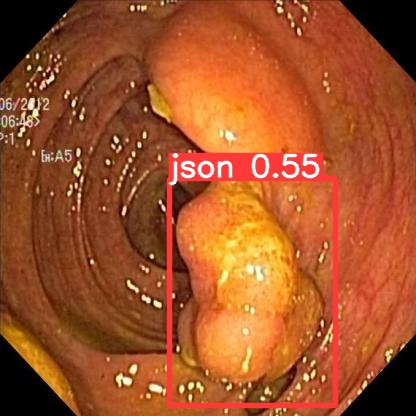

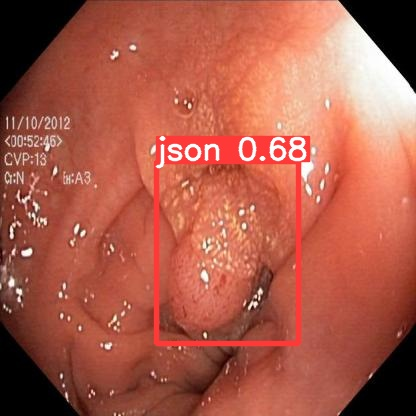

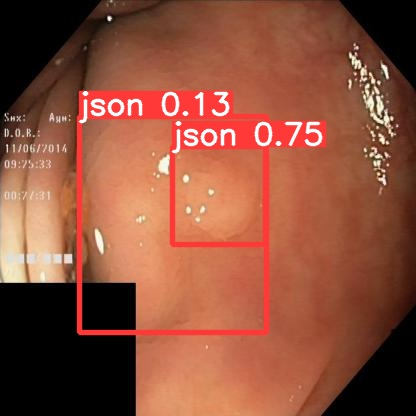

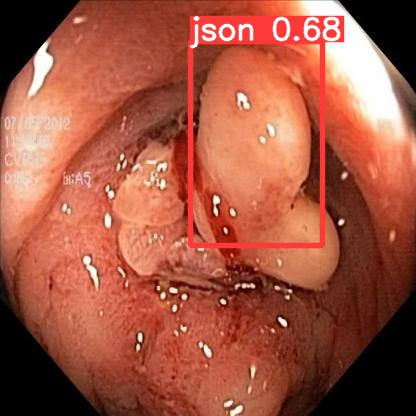

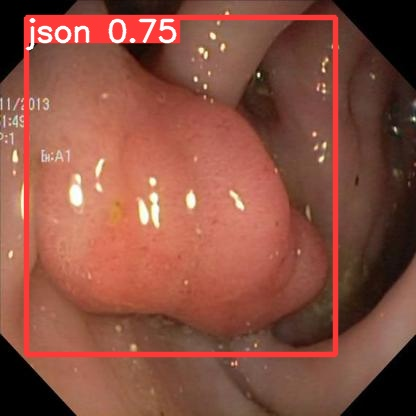

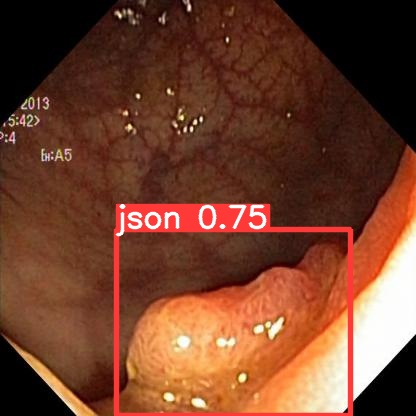

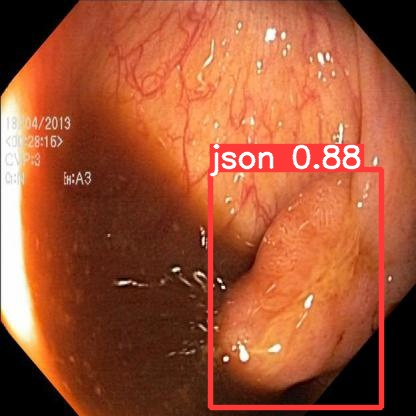

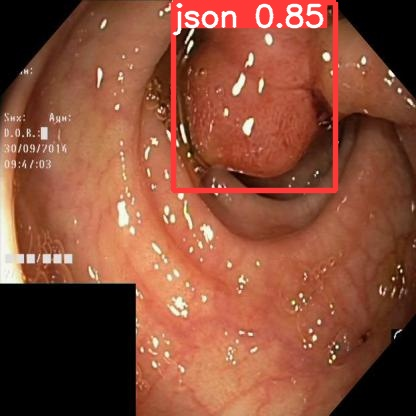

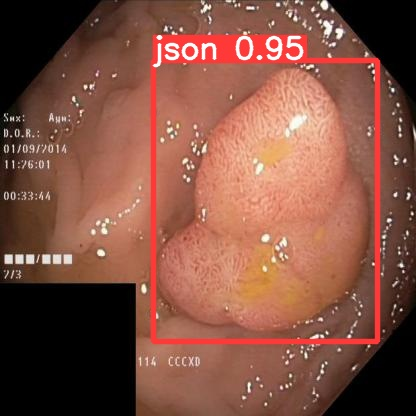

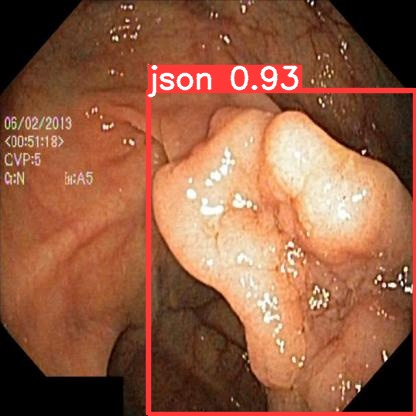

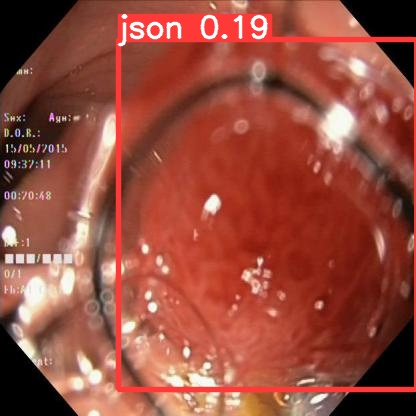

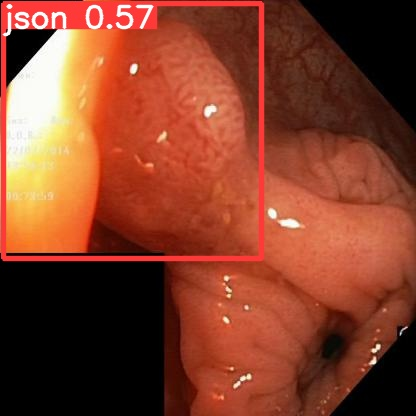

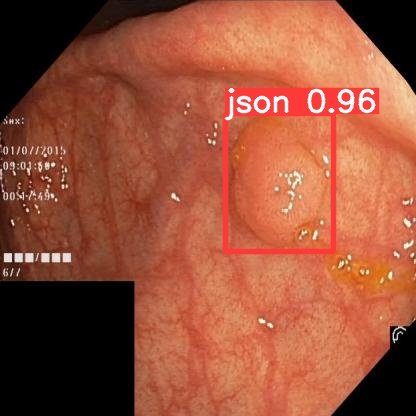

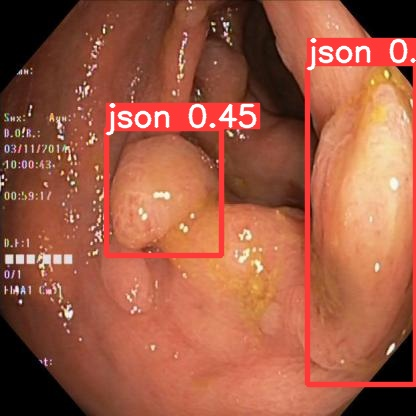

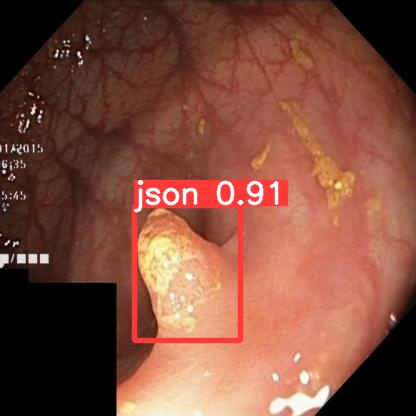

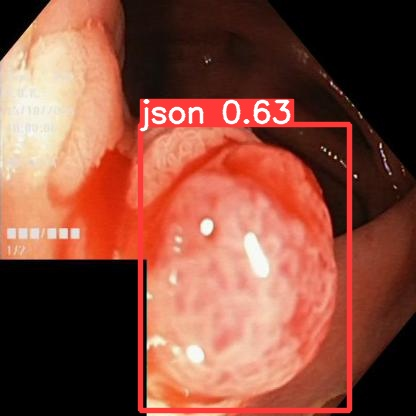

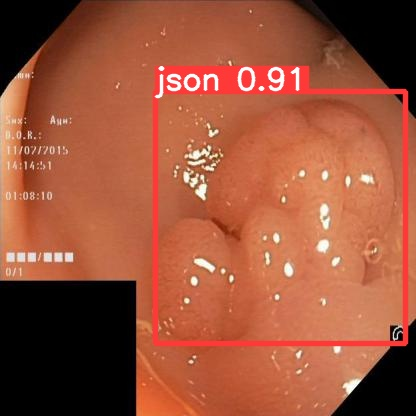

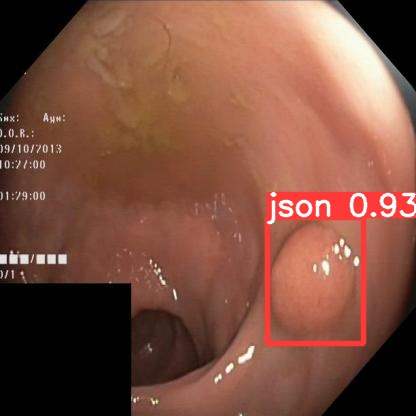

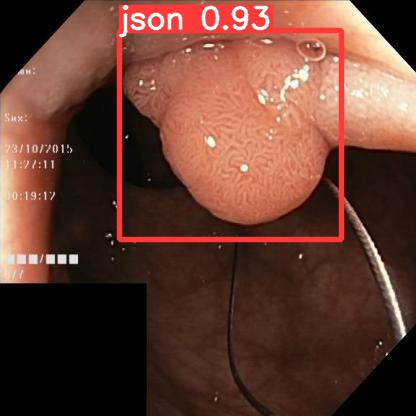

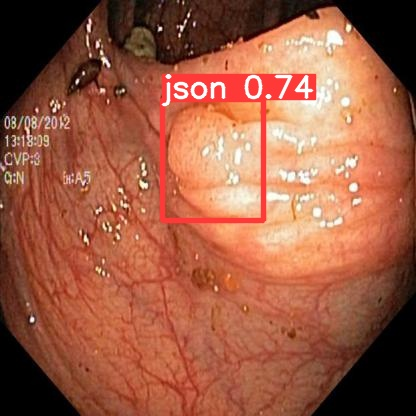

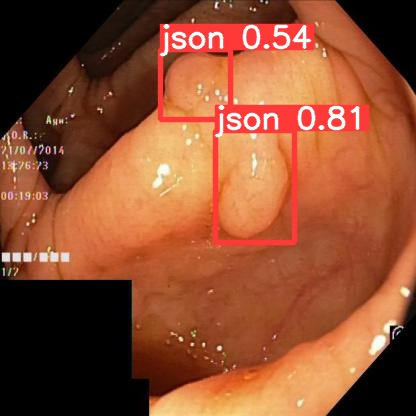

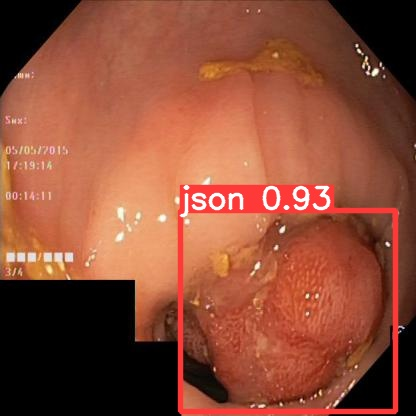

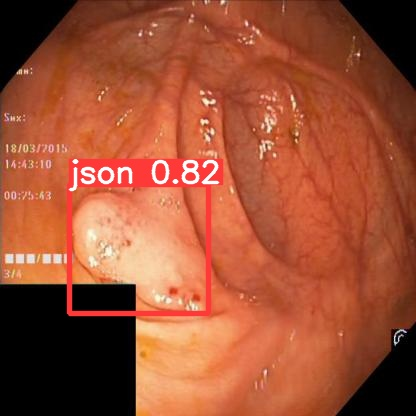

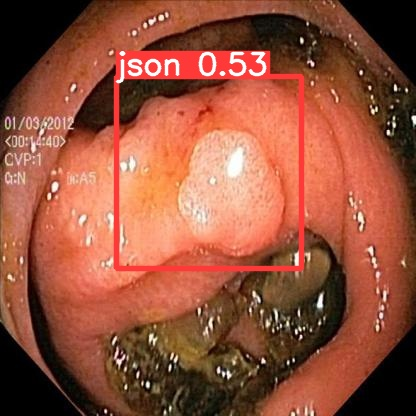

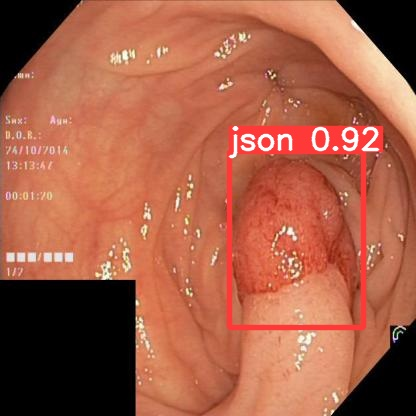

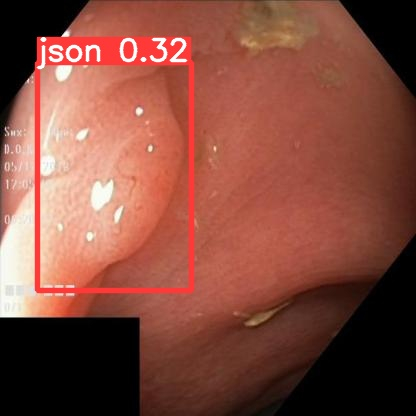

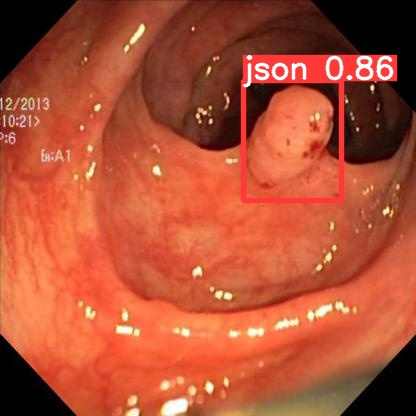

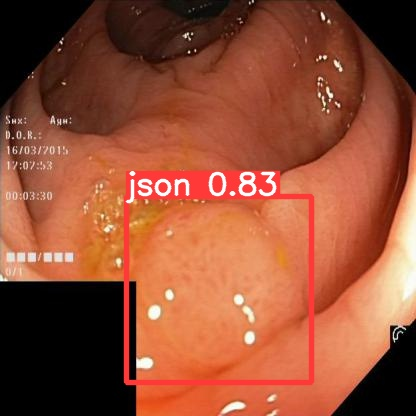

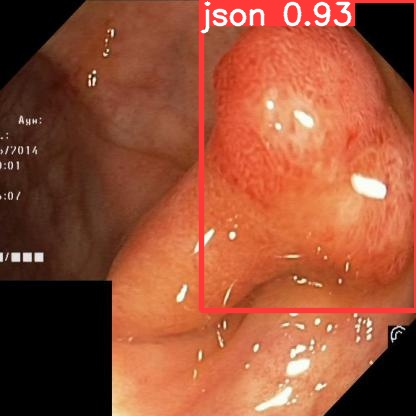

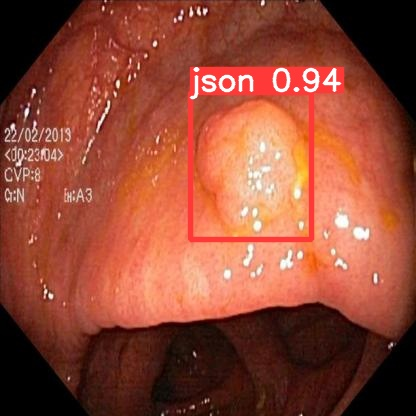

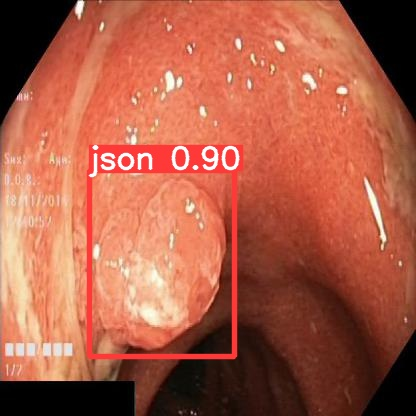

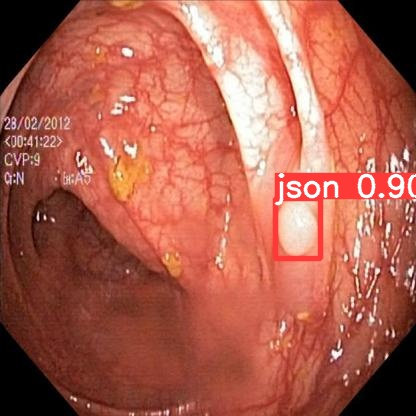

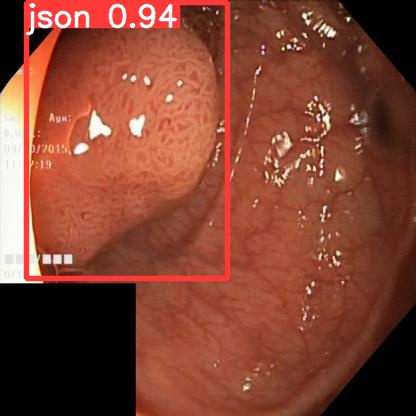

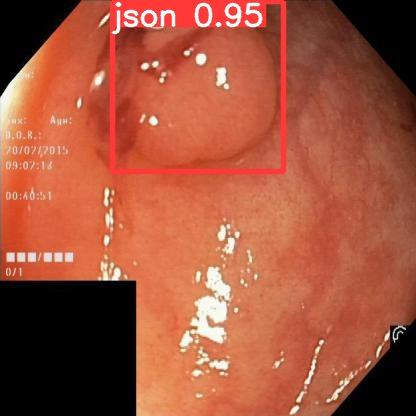

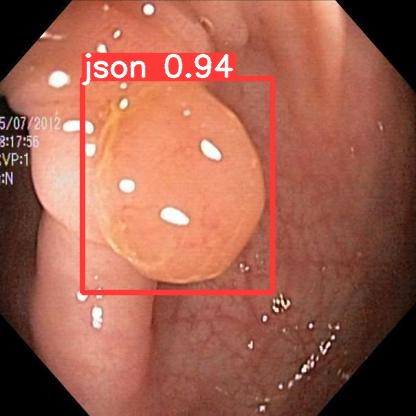

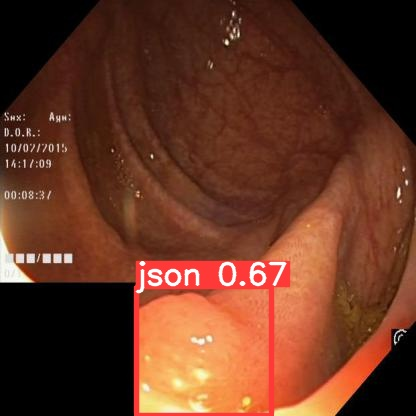

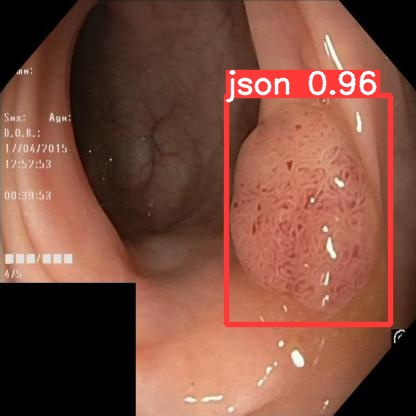

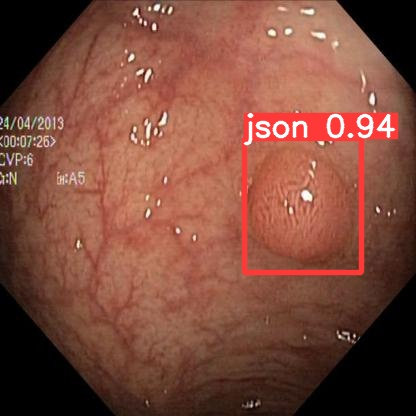

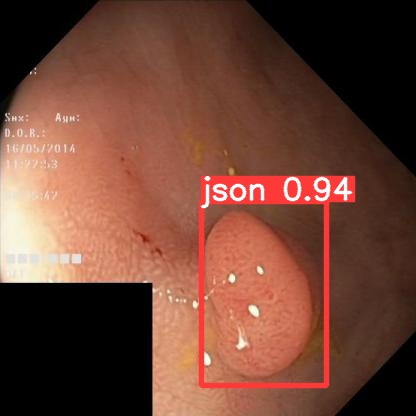

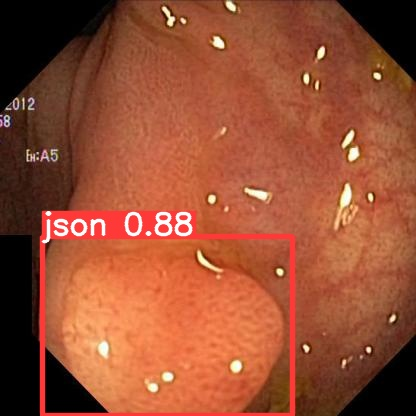

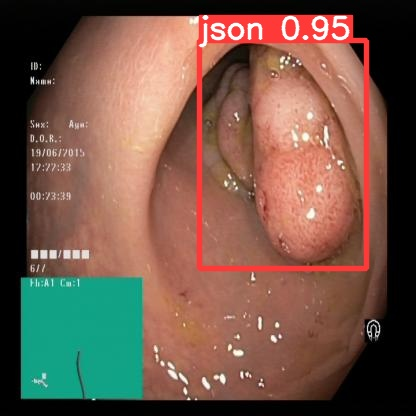

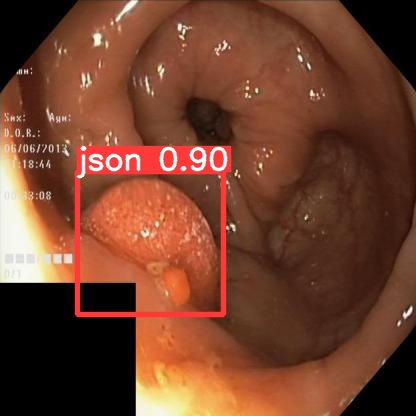

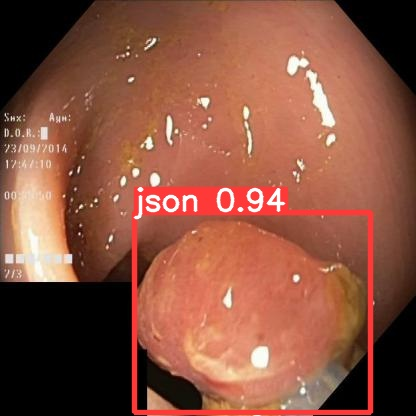

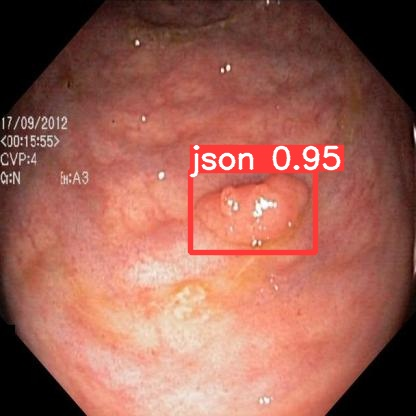

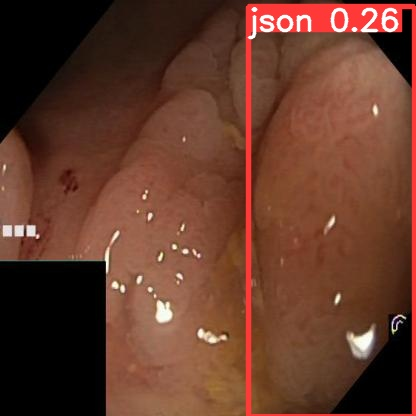

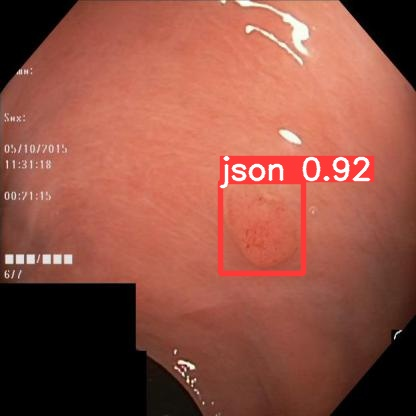

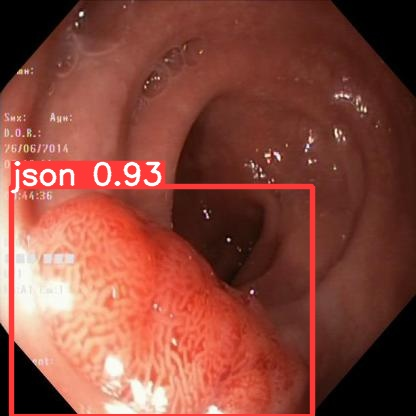

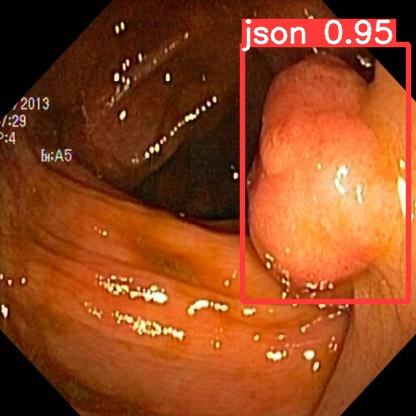

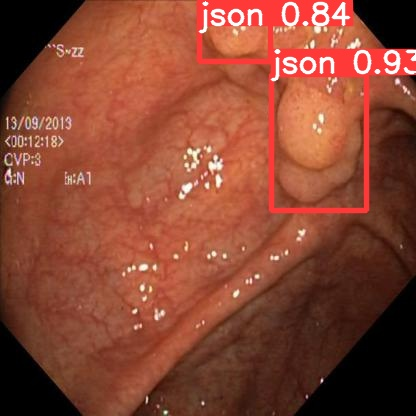

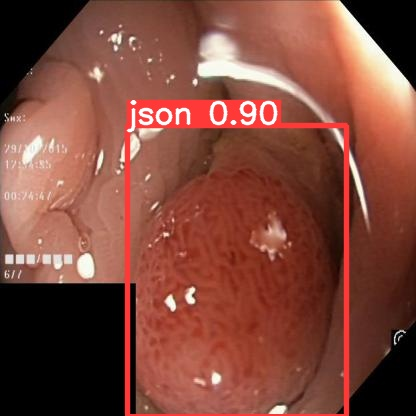

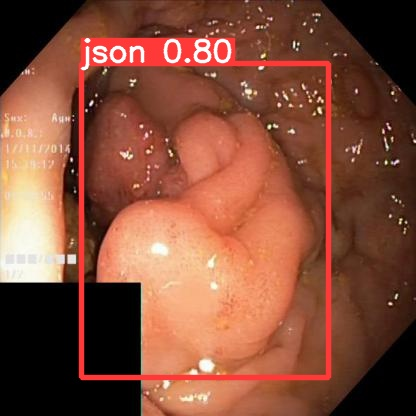

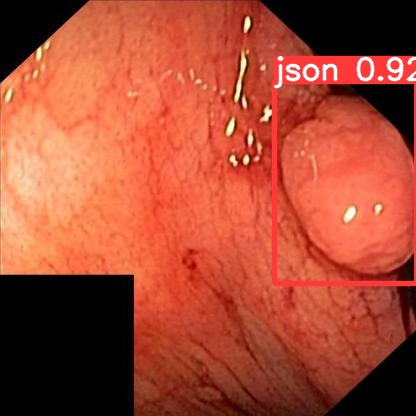

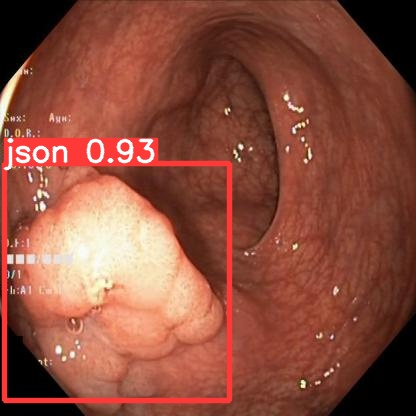

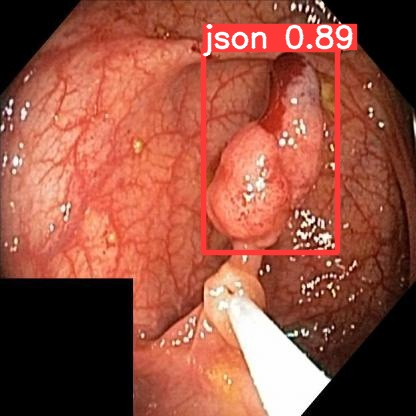

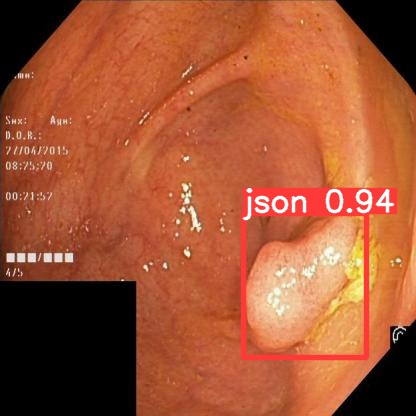

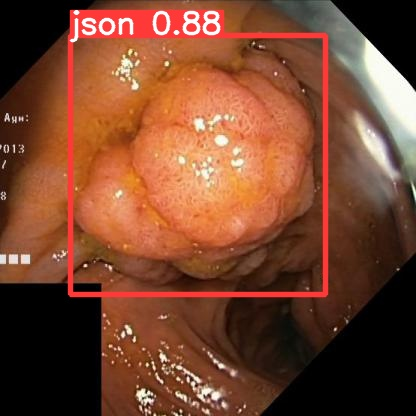

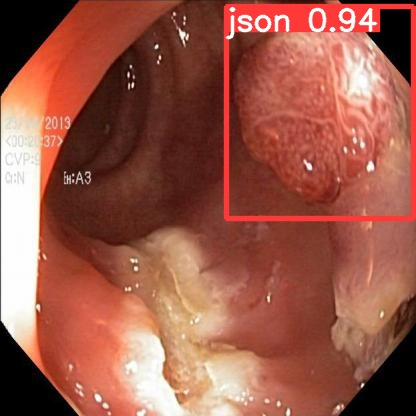

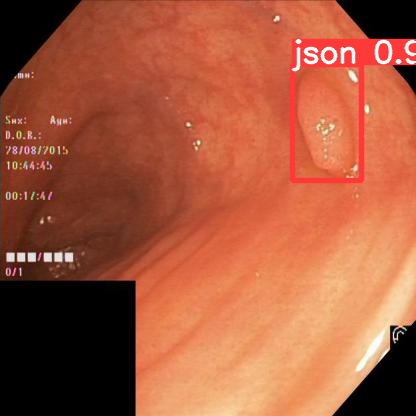

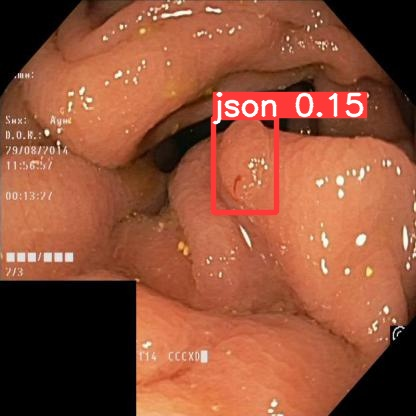

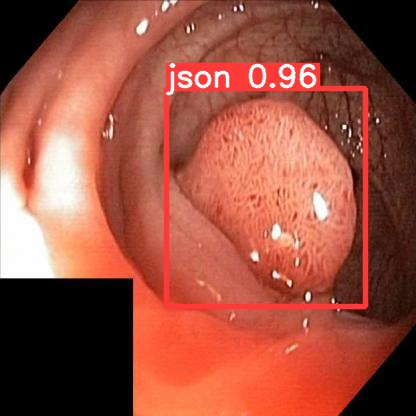

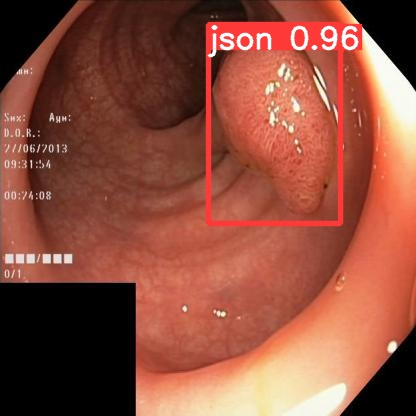

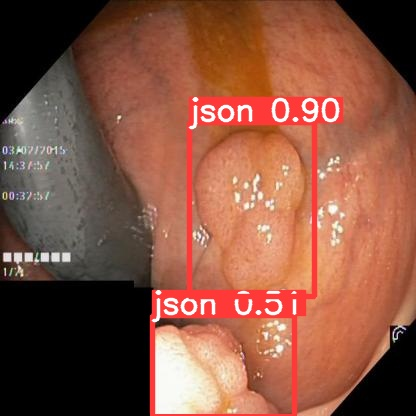

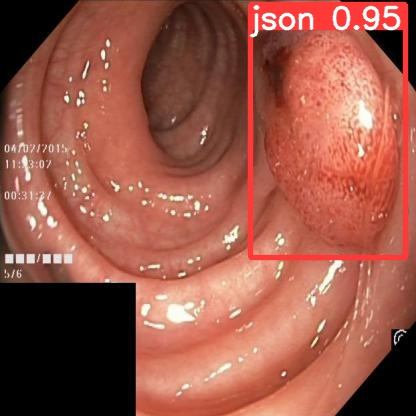

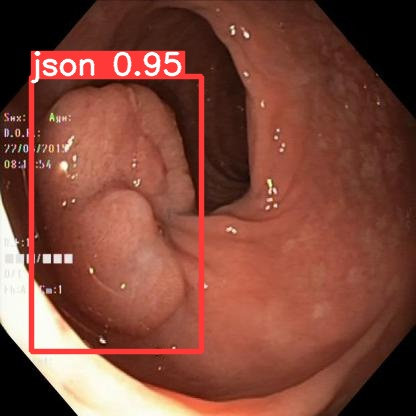

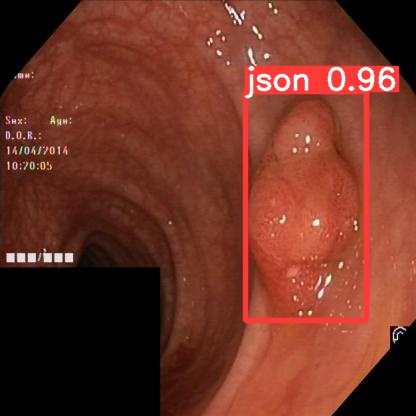

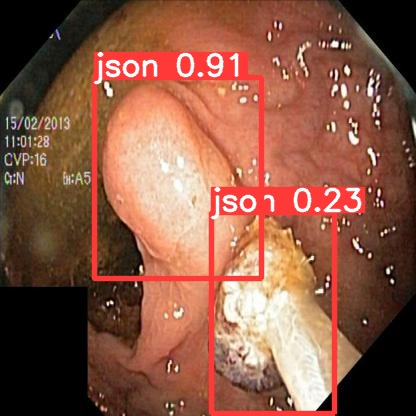

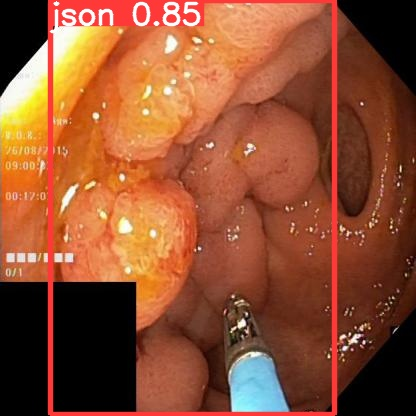

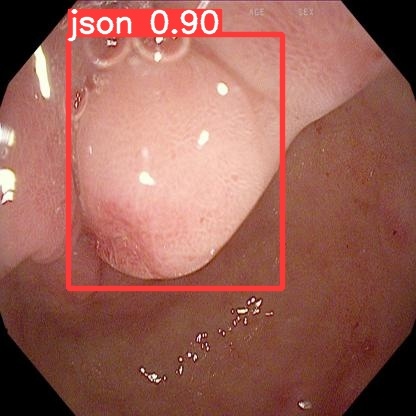

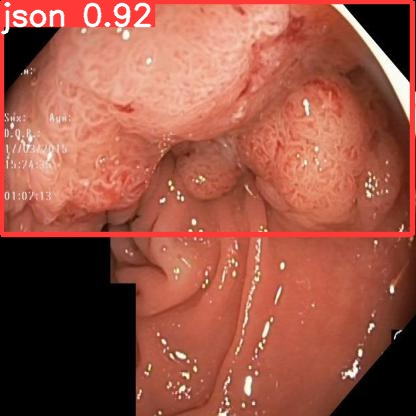

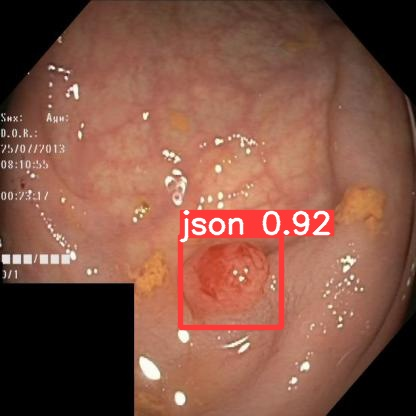

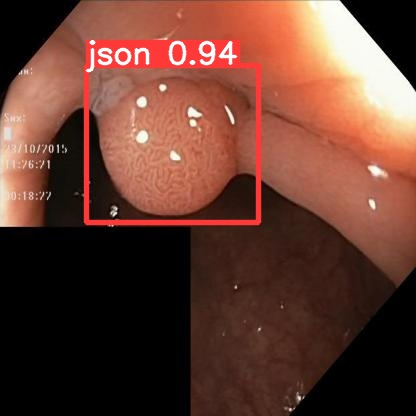

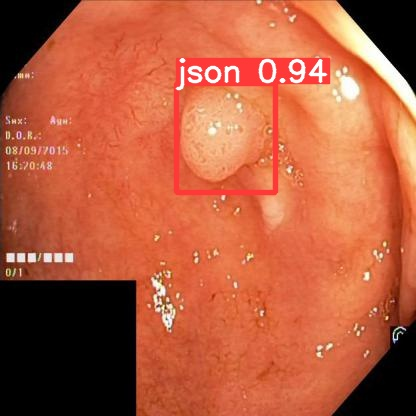

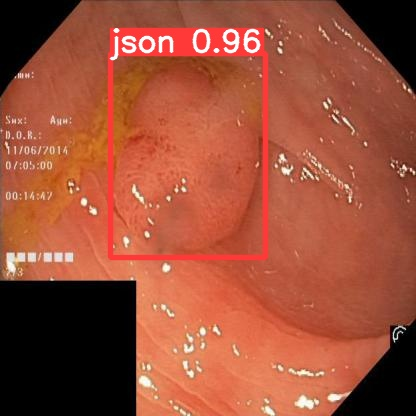

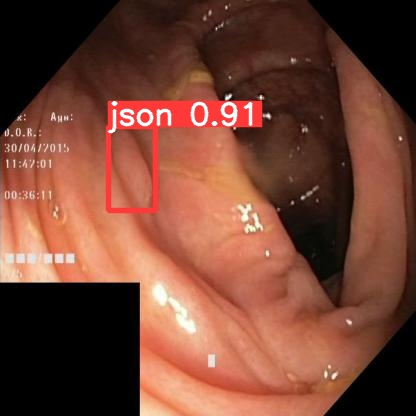

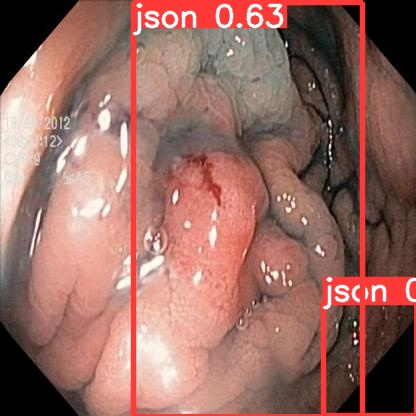

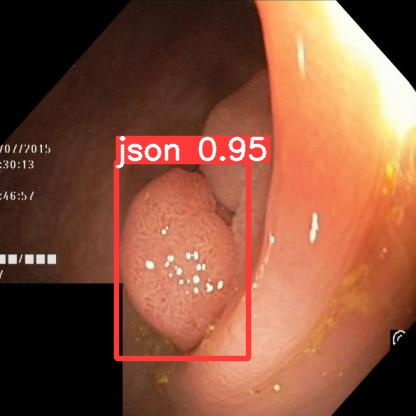

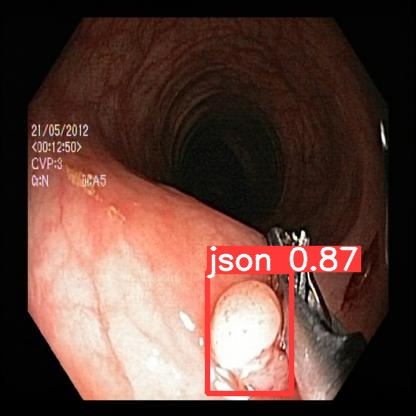

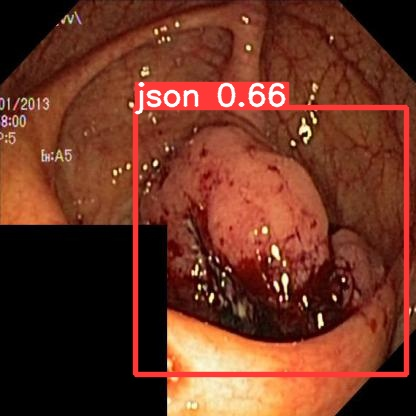

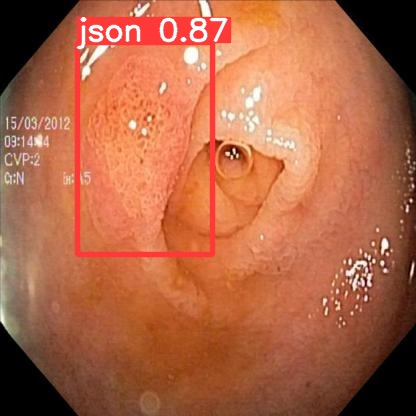

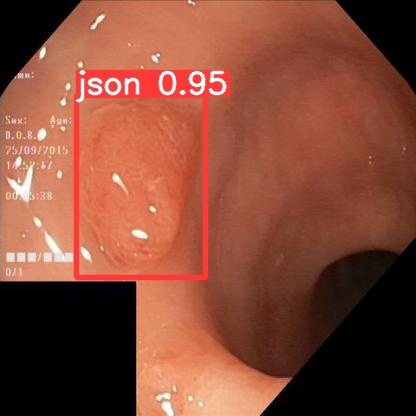

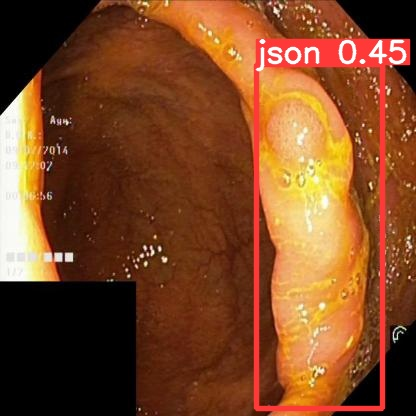

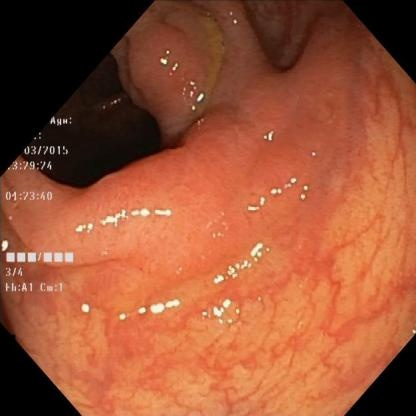

In [27]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Conclusion and Next Steps

Congratulations! You've trained a custom YOLOv5 model to recognize your custom objects.

To improve you model's performance, we recommend first interating on your datasets coverage and quality. See this guide for [model performance improvement](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

To deploy your model to an application, see this guide on [exporting your model to deployment destinations](https://github.com/ultralytics/yolov5/issues/251).

Once your model is in production, you will want to continually iterate and improve on your dataset and model via [active learning](https://blog.roboflow.com/what-is-active-learning/).

In [ ]:
!pip install captum

## Pooya-Mohammadi

In [13]:
%%bash
cd /content
git clone https://github.com/pooya-mohammadi/yolov5-gradcam /content/yolov5-gradcam
cd /content/yolov5-gradcam/
pip install -r requirements.txt

  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


fatal: destination path '/content/yolov5-gradcam' already exists and is not an empty directory.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [36]:
%%bash
cd /content/yolov5-gradcam/
python main.py --model-path /content/yolov5/runs/train/exp/weights/best.pt --img-size 416 --img-path /content/datasets/Kvasir-SEG-1/test/images/cju7d9seq29zd0871nzl2uu5m_jpg.rf.73a9fb68b88e9bbdcb94c60c3d6b4fa0.jpg --names 'json' --device 'cuda' --output-dir output
python main.py --model-path /content/yolov5/runs/train/exp/weights/best.pt --img-size 416 --img-path /content/datasets/Kvasir-SEG-1/test/images/cju7b3f5h1sm40755i572jden_jpg.rf.6698000fd489a5040d499dc04877e045.jpg --names 'json' --device 'cuda' --output-dir output


[INFO] Loading the model
[INFO] Model is loaded
[INFO] saliency_map size : torch.Size([13, 13])
[INFO] model-forward took:  0.0327 seconds
[INFO] json, model-backward took:  0.0187 seconds
total time: 0.0531
[INFO] Saving the final image at output/cju7d9seq29zd0871nzl2uu5m_jpg.rf.73a9fb68b88e9bbdcb94c60c3d6b4fa0-res.jpg
[INFO] Loading the model
[INFO] Model is loaded
[INFO] saliency_map size : torch.Size([13, 13])
[INFO] model-forward took:  0.0325 seconds
[INFO] json, model-backward took:  0.0171 seconds
total time: 0.0512
[INFO] Saving the final image at output/cju7b3f5h1sm40755i572jden_jpg.rf.6698000fd489a5040d499dc04877e045-res.jpg


Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Node

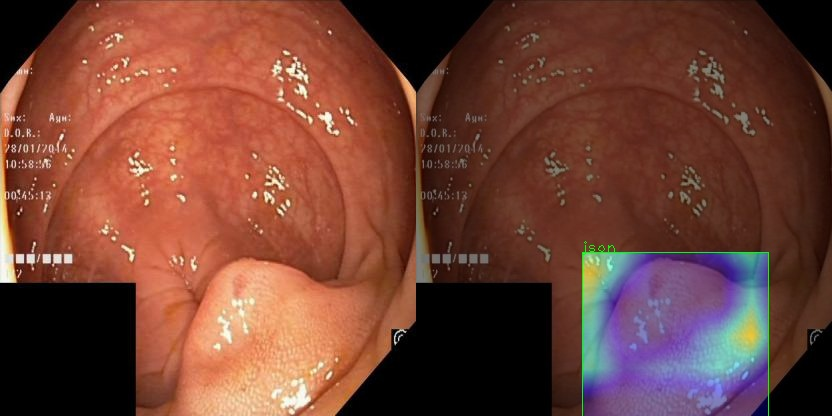

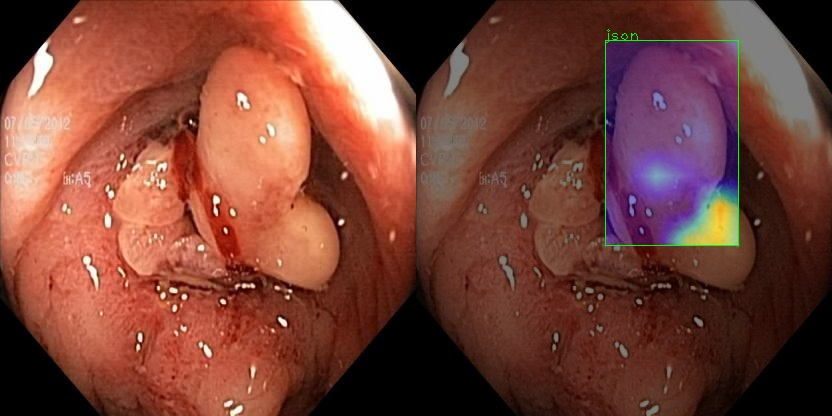

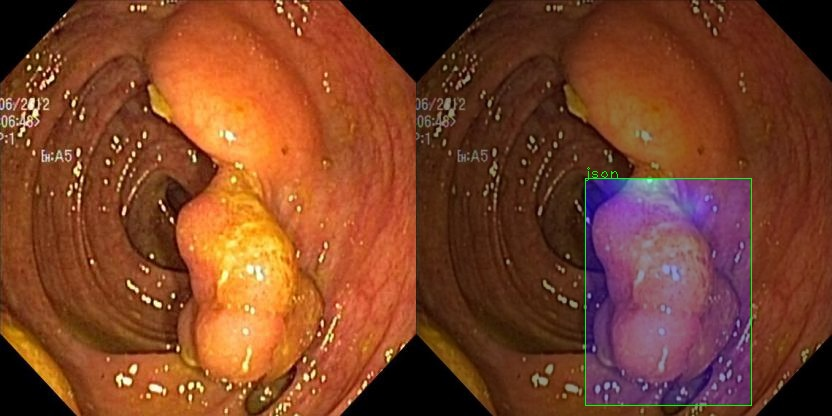

In [37]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5-gradcam/output/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")